## K-Mean Clustering

Automatic grouping of similar objects into sets.

In [24]:
# Only we have x-axis not y-axis

In [25]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 

# importing dataset 
df=sns.load_dataset('titanic')
df.head()

df['age']=df['age'].fillna(df['age'].mean())

In [26]:
# Model 
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [27]:
x=df[['age','fare']]

# Scaling the data 

scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

# Perform Clustering 
model=KMeans(n_clusters=3)
model.fit(x_scaled)

KMeans(n_clusters=3)

In [28]:
# Assigning Cluster Labels to the Data 
df['Cluster']=model.labels_

In [29]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Cluster
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,2
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,2
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0


In [30]:
df['Cluster'].unique()

array([2, 0, 1])

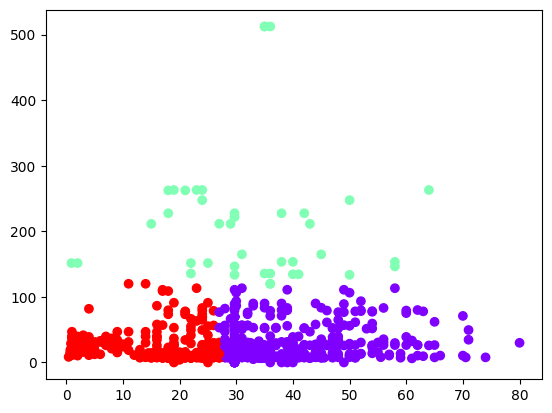

In [31]:
# Making a Scatter Plot 
plt.scatter(df['age'],df['fare'],c=df['Cluster'],cmap='rainbow')
plt.show()

In [32]:
import plotly.express as px
fig=px.scatter(df,x='age',y='fare',color='Cluster')
fig.show()

In [33]:
# Making 3-D Scatter plot 
import plotly.express as px
fig=px.scatter_3d(df,x='age',y='fare',z='pclass',color='Cluster')
fig.show()

In [34]:
fig=px.parallel_coordinates(df,color='Cluster',title='Titanic Cluster')
fig.show()